In [1]:
import cv2
import torch
import urllib.request
from IPython.display import Image

import matplotlib.pyplot as plt

filename1,filename2 = 'artInstitutePic.jpg', 'nazam_wedding.jpg'

In [4]:
model_type = "DPT_Large"

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /Users/emmanuelamobi/.cache/torch/hub/intel-isl_MiDaS_master


In [5]:
device = "cpu"
midas.to(device)

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (drop_path): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (act): GELU()
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
            (dro

In [6]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /Users/emmanuelamobi/.cache/torch/hub/intel-isl_MiDaS_master


In [7]:
def depth(img):
    img_tr = cv2.imread(img)
    img_tr = cv2.cvtColor(img_tr, cv2.COLOR_BGR2RGB)

    input_batch = transform(img_tr).to(device)

    with torch.no_grad():
        prediction = midas(input_batch)

        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img_tr.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    output = prediction.cpu().numpy()
    return output

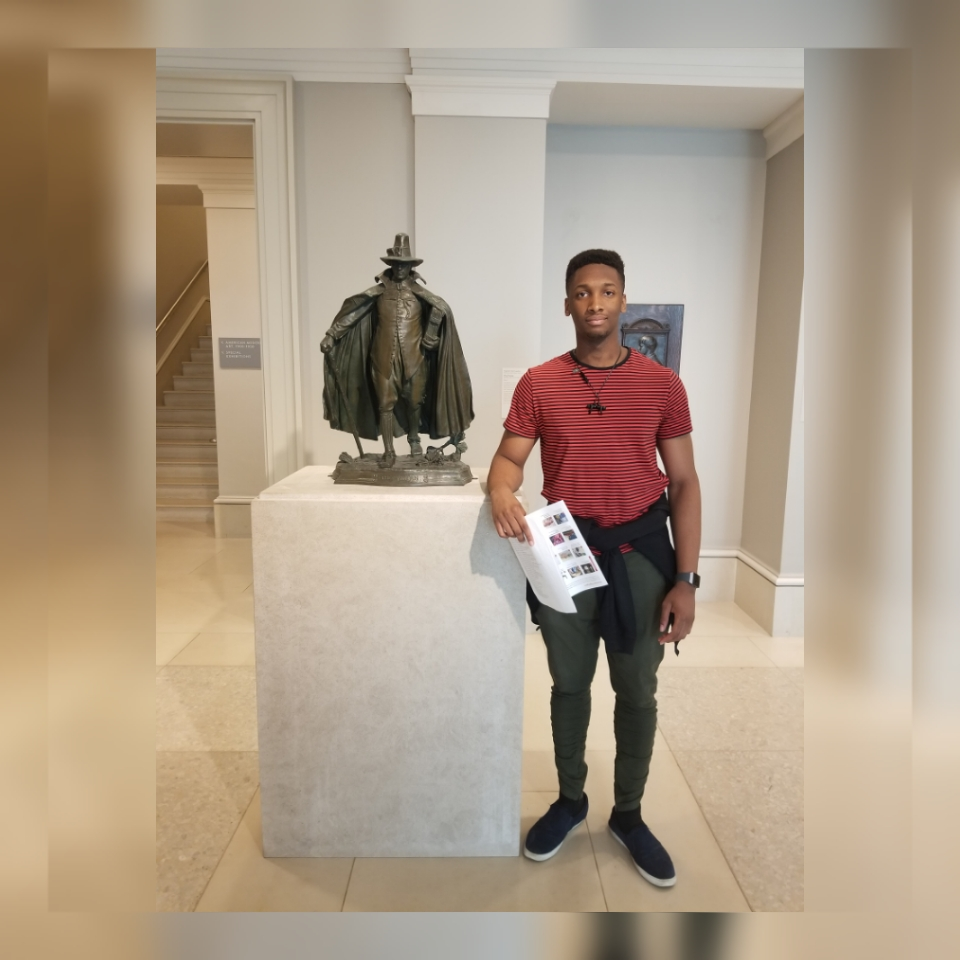

In [9]:
Image(filename1)

/Users/emmanuelamobi/.virtualenvs/mlenv/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


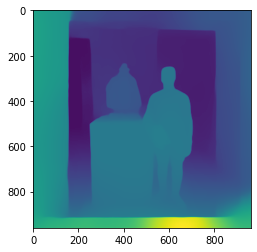

In [8]:
plt.imshow(depth(filename1))

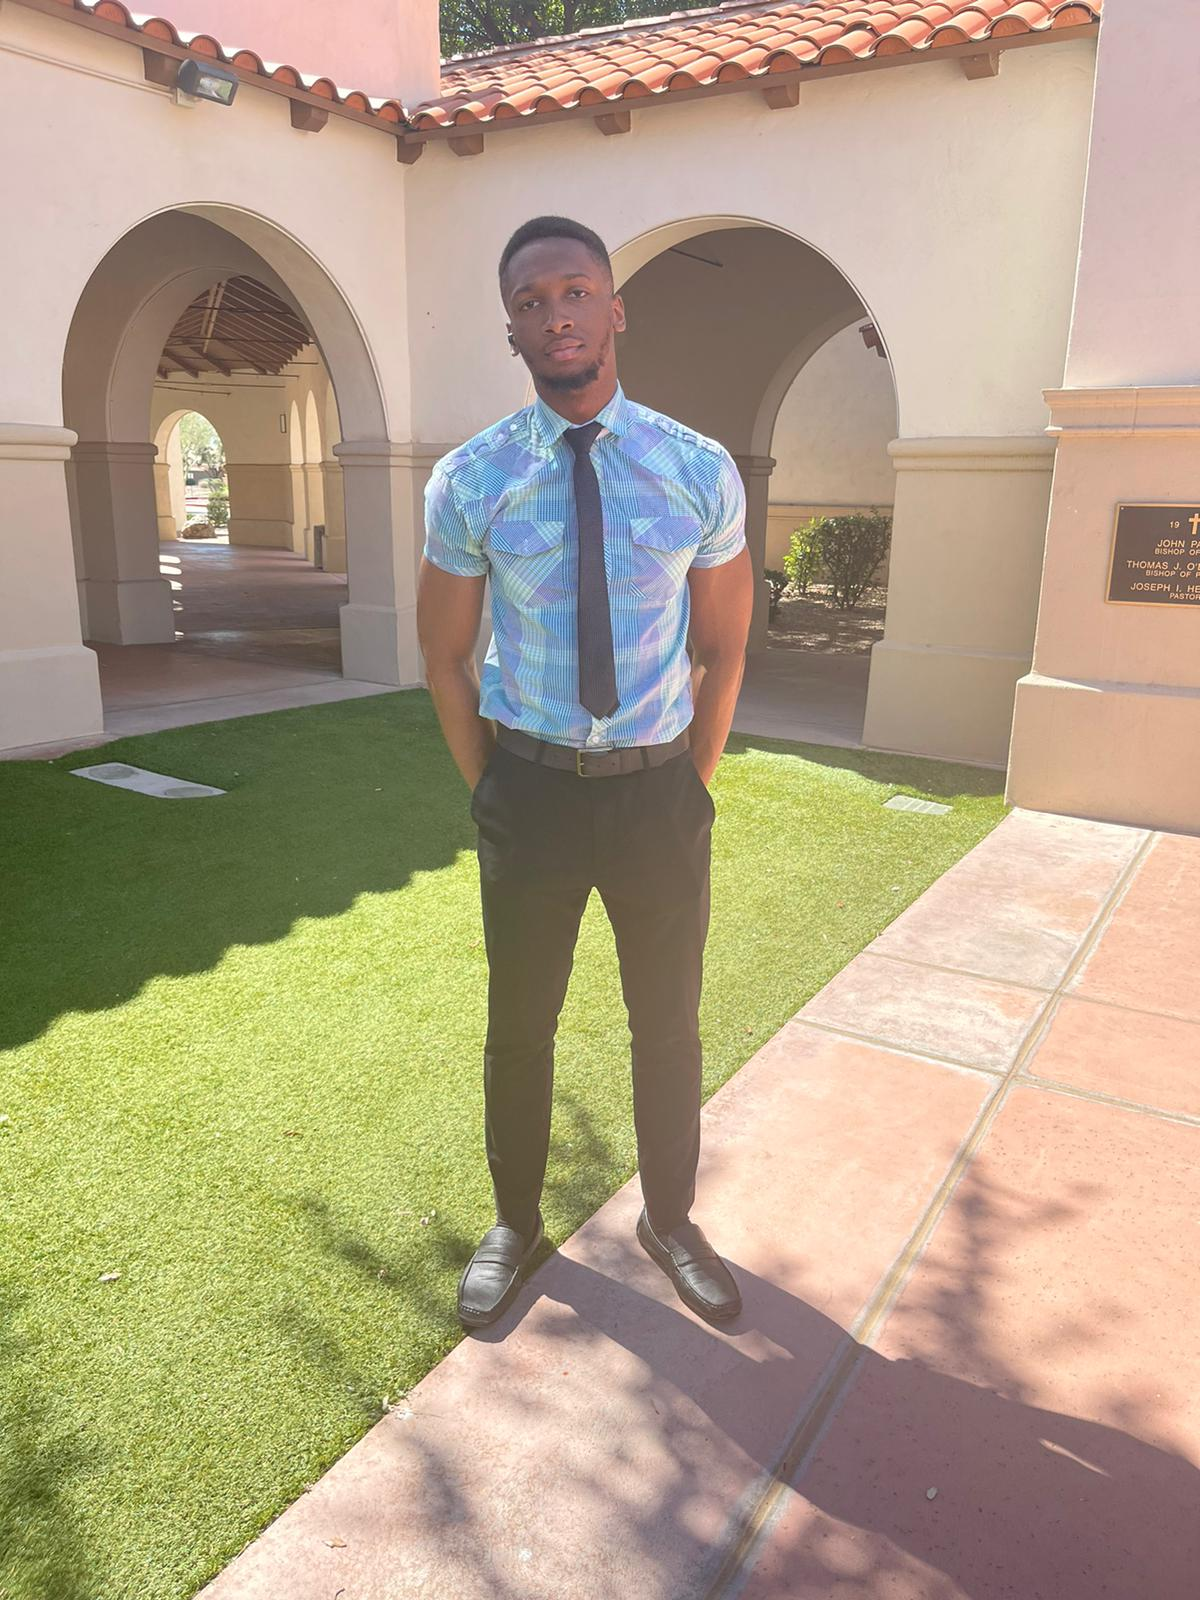

In [10]:
Image(filename2)

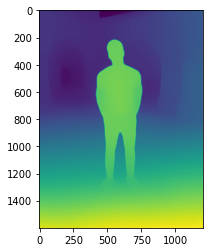

In [13]:
plt.imshow(depth(filename2))